Electiva Bases de Datos
Taller No 2
Nombre: Diego Tobar

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFram

subir dataset

In [2]:
data=pd.read_csv('./Saber_pro.csv', sep=';') 

1.1.0 preparacion del conjunto de datos

In [3]:
display(data.isnull().sum())
data=data.dropna(axis = 0)

nota                            0
genero                          0
estu_edad_examen               67
estado_civil                    0
estu_hogar_actual               0
estu_sn_cabeza_fmlia            0
estu_pers_cargo                66
fami_nivel_educa_padres         0
fami_ocup_padre                 0
fami_ocup_madre                 0
inst_tipo                       0
inst_caracter_academico         0
inst_acreditada                 0
prog_acreditado                 0
inst_programa_zona              0
estu_metodo_prgm                0
estu_area_conoc                 0
area_grupo_referencia           0
estu_pje_creditos              96
estu_titulo_bto                 0
estu_financiacion_matricula     0
estu_estrato                    0
fami_nivel_sisben               0
econ_condicion_vivienda         0
eco_condicion_hogar             0
eco_condicion_transporte        0
eco_condicion_tic               0
eco_condicion_vive             68
fami_ing_fmliar_mensual         0
estu_trabaja  

In [4]:
display(data.isnull().sum())

nota                           0
genero                         0
estu_edad_examen               0
estado_civil                   0
estu_hogar_actual              0
estu_sn_cabeza_fmlia           0
estu_pers_cargo                0
fami_nivel_educa_padres        0
fami_ocup_padre                0
fami_ocup_madre                0
inst_tipo                      0
inst_caracter_academico        0
inst_acreditada                0
prog_acreditado                0
inst_programa_zona             0
estu_metodo_prgm               0
estu_area_conoc                0
area_grupo_referencia          0
estu_pje_creditos              0
estu_titulo_bto                0
estu_financiacion_matricula    0
estu_estrato                   0
fami_nivel_sisben              0
econ_condicion_vivienda        0
eco_condicion_hogar            0
eco_condicion_transporte       0
eco_condicion_tic              0
eco_condicion_vive             0
fami_ing_fmliar_mensual        0
estu_trabaja                   0
num_estu_z

In [5]:
n_most_50=len(data[data['nota']=='SOBRE LA MEDIA'])
n_records=len(data)
n_min_50=len(data[data['nota']=='BAJO LA MEDIA'])
display(n_min_50)
display(n_most_50)
display(n_records)

38944

38475

77419

In [6]:
Y=data['nota']
display(Y)

0         BAJO LA MEDIA
1        SOBRE LA MEDIA
2         BAJO LA MEDIA
3         BAJO LA MEDIA
4         BAJO LA MEDIA
              ...      
77644     BAJO LA MEDIA
77645     BAJO LA MEDIA
77646    SOBRE LA MEDIA
77647     BAJO LA MEDIA
77648     BAJO LA MEDIA
Name: nota, Length: 77419, dtype: object

In [7]:
X=data.drop(labels=['nota'],axis=1)#predictoras

In [8]:
df_dummies=pd.get_dummies(X)
display(df_dummies)

,estu_edad_examen,num_estu_zona,num_instituciones_zona,genero_F,genero_M,estado_civil_CASADO(A),estado_civil_SEPARADO(A) Y/O DIVORCIADO,estado_civil_SOLTERO(A),estado_civil_UNION LIBRE,estado_civil_VIUDO(A),...,fami_ing_fmliar_mensual_CUATRO SALARIOS,fami_ing_fmliar_mensual_DOS SALARIOS,fami_ing_fmliar_mensual_SEIS SALARIOS,fami_ing_fmliar_mensual_SIETE SALARIOS,fami_ing_fmliar_mensual_TRES SALARIOS,fami_ing_fmliar_mensual_UN SALARIO,estu_trabaja_NO,"estu_trabaja_SI, PARA ADQUIRIR EXPERIENCIA Y/O RECURSOS PARA SUS GASTOS PERSONALES","estu_trabaja_SI, PARA CONTRIBUIR A PAGAR SU MATRICULA Y/O LOS GASTOS DEL HOGAR","estu_trabaja_SI, POR SER PRACTICA OBLIGATORIA DEL PROGRAMA DE ESTUDIOS"
0,24.0,13733,64,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,23.0,16500,78,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,30.0,33544,73,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,20.0,13519,56,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,34.0,13345,64,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77644,22.0,33544,73,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
77645,22.0,5283,21,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
77646,22.0,13733,64,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
77647,23.0,33544,73,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [9]:
Y=Y.str.replace('SOBRE LA MEDIA','1')
Y=Y.replace('BAJO LA MEDIA','0')
display(Y)

0        0
1        1
2        0
3        0
4        0
        ..
77644    0
77645    0
77646    1
77647    0
77648    0
Name: nota, Length: 77419, dtype: object

punto: 1.1.1
separacion de las poblaciones de entrenamineto y validacion
entrenamiento=70%
validacion=30%

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_dummies,Y,test_size=0.3,random_state=0)

print(">media train",y_train[y_train=='1'].count())
print("<media train",y_train[y_train=='0'].count())


print(">media test",y_test[y_test=='1'].count())
print("<media test",y_test[y_test=='0'].count())

>media train 26937
<media train 27256
>media test 11538
<media test 11688


1.1.2 creacion de arbol de decisiòn

In [11]:
from sklearn import tree

#crear modelo
modelo=tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=1000,
                                            min_samples_leaf=500,
                                            max_depth = 7)
modelo.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=500, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

1.1.3 despues de explotar el arbol el mejor arbol posible al parcer es con una profudidad de 7 y criterion='entropy'


d:\python\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


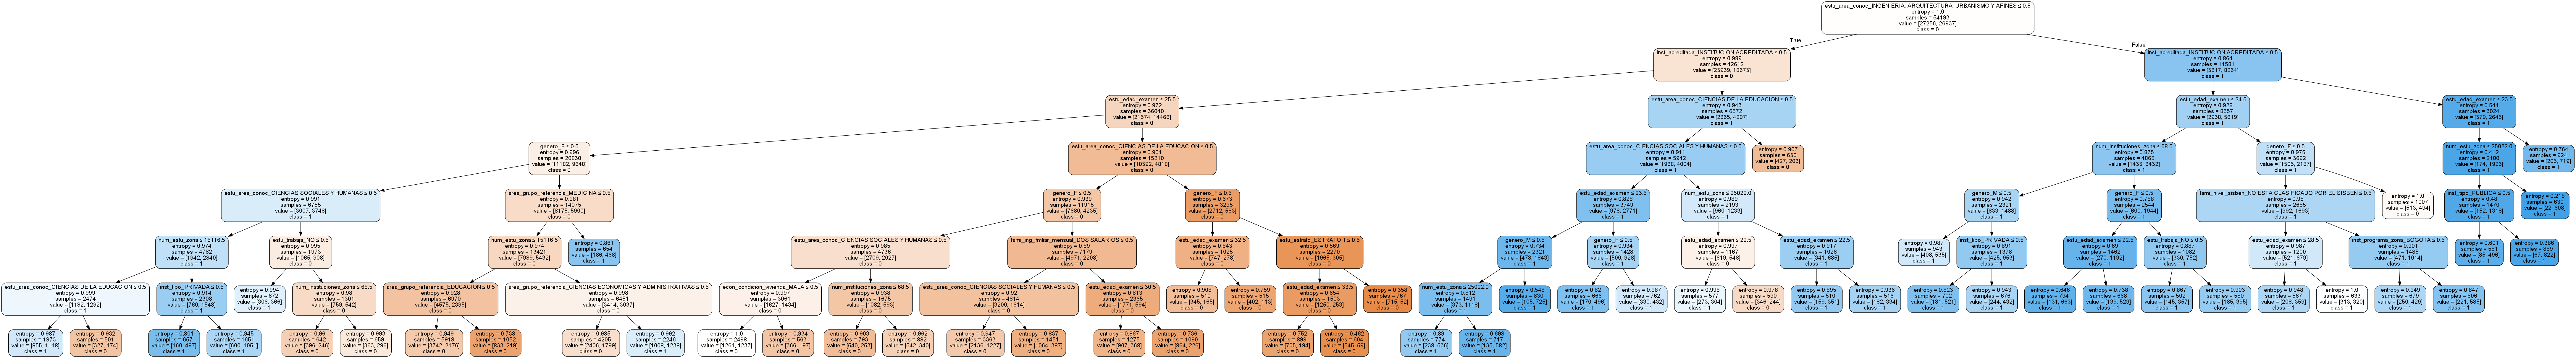

In [12]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
#pip install graphviz
#pip install pydotplus
dot_data = StringIO()


feature_cols=X_train.columns
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

el nodo raiz indica que tenemos una muestra de 54193, de los cuales 27256 son estudiantes que pertenecen al area de ingenieria Arquitectura  y 26973 son estudiantes de otras areas de conocimiento.
los primeros nodos hijos del nodo raiz, el de la izquierda nos dice que de los 54193 estudiantes de la muestra 23939 pertenecen a una institucion acredita y 18673 no pertenecen a una institucion acreditada, el nodo de la derecha en este nivel indica que del total de la muestra 11581 no son del area de ingenieria y de los cuales 3317 pertenecen a una institucion acreditada y 8264 pertenecen a una institucion acredita.


In [13]:
# 1.1.4 matrix de confusion de test y train

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,classification_report

#predecir test 
y_pred_test=modelo.predict(X_test)  #arrojar las prediciones test
y_pred_train=modelo.predict(X_train) #train
#matriz de confusion
display('Test:',confusion_matrix(y_test,y_pred_test))

'Test:'

array([[8378, 3310],
       [4607, 6931]], dtype=int64)

In [14]:
# 1.1.5 Calculo de accuracy de test y train

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_test).ravel()
ac=(tp/tn)/(tp+tn+fp+fn)

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)
print("accuracy test:",accuracy_score(y_test, y_pred_test))
print("accuracy train:",accuracy_score(y_train, y_pred_train))
print(ac)
display(classification_report(y_test,y_pred_test))

verdaderos positivos: 6931
verdaderos negativos: 8378
falsos positivos: 3310
falsos negativos: 4607
accuracy test: 0.659132007233273
accuracy train: 0.6645323196722824
3.561895067547735e-05


'              precision    recall  f1-score   support\n\n           0       0.65      0.72      0.68     11688\n           1       0.68      0.60      0.64     11538\n\n    accuracy                           0.66     23226\n   macro avg       0.66      0.66      0.66     23226\nweighted avg       0.66      0.66      0.66     23226\n'

In [15]:
#1.1.6 Calculo de AUC y grafico ROC

probs_test=modelo.predict_proba(X_test)
data_set_test=X_test.copy()
#display(data_set_test.head(5))
#·pegar el valor predicho
data_set_test['predicho']=y_pred_test
#probabilidad de predicho 1
data_set_test['predicho_prob_1']=probs_test[:,1]
data_set_test['predicho_prob_0']=probs_test[:,0]
data_set_test['real']=y_test
display(data_set_test.head(5))

,estu_edad_examen,num_estu_zona,num_instituciones_zona,genero_F,genero_M,estado_civil_CASADO(A),estado_civil_SEPARADO(A) Y/O DIVORCIADO,estado_civil_SOLTERO(A),estado_civil_UNION LIBRE,estado_civil_VIUDO(A),...,fami_ing_fmliar_mensual_TRES SALARIOS,fami_ing_fmliar_mensual_UN SALARIO,estu_trabaja_NO,"estu_trabaja_SI, PARA ADQUIRIR EXPERIENCIA Y/O RECURSOS PARA SUS GASTOS PERSONALES","estu_trabaja_SI, PARA CONTRIBUIR A PAGAR SU MATRICULA Y/O LOS GASTOS DEL HOGAR","estu_trabaja_SI, POR SER PRACTICA OBLIGATORIA DEL PROGRAMA DE ESTUDIOS",predicho,predicho_prob_1,predicho_prob_0,real
41257,26.0,13519,56,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0.288627,0.711373,1
32478,24.0,13733,64,0,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0.744745,0.255255,0
73283,23.0,5283,21,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0.567338,0.432662,0
56246,26.0,33544,73,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0.364853,0.635147,1
9159,40.0,33544,73,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0.495196,0.504804,0


In [16]:
#armar la curva de roc para este modelo
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def my_roc(y_real,y_pred):
    y_real =label_binarize(y_real, classes=['0', '1'])
    y_pred =label_binarize(y_pred, classes=['0', '1'])
    print(y_real)
    fpr, tpr, _ = roc_curve(y_real.ravel(), y_pred.ravel())
    roc_auc=auc(fpr,tpr)
    
    plt.figure()
    lw=2
    plt.plot(fpr, tpr, color='orange', 
        lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) example')
    plt.legend(loc="lower right")
    plt.show()
    return (roc_auc)

my_roc(y_test,y_pred_test)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


<Figure size 640x480 with 1 Axes>

0.6587571271502468

# 1.1.7
1.1.7	Utilizar el conjunto de entrenamiento calcule el promedio de AUC y accuracy con el método de validación cruzada con 10 folds o particiones.


[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


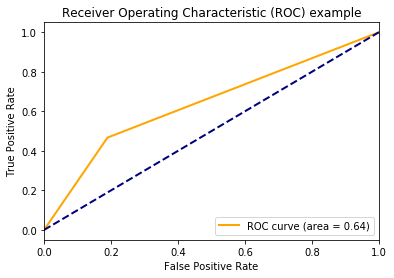

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


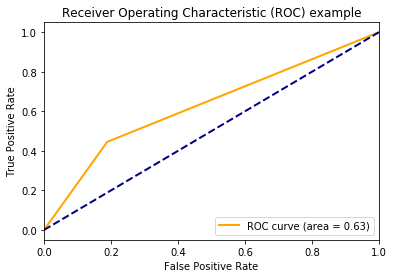

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


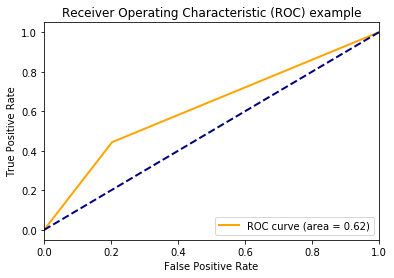

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


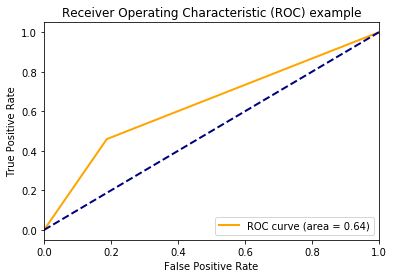

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


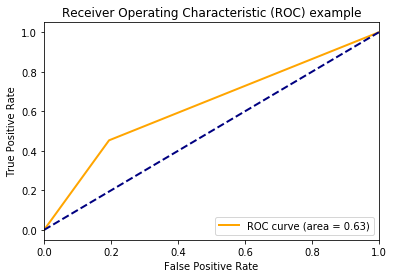

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


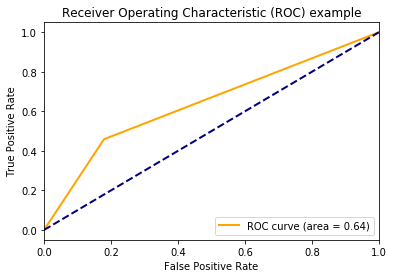

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


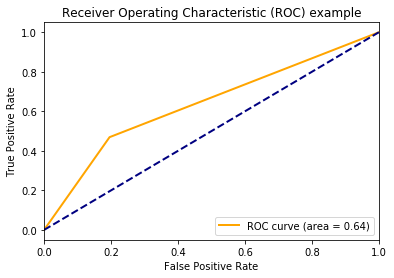

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


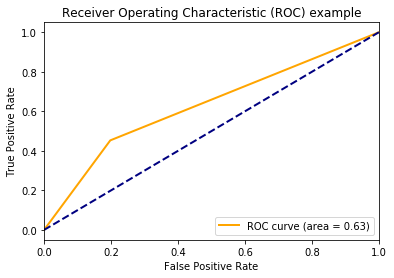

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


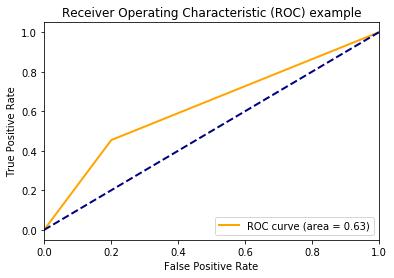

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


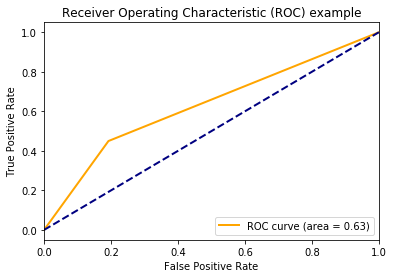

0.6313152837085232


In [17]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=False)

aucs = []
for train,test in cv.split(X_train,y_train):
    m=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')
    m.fit(X_train.iloc[train],y_train.iloc[train])
    aucs.append(my_roc(y_train.iloc[test],
                m.predict(X_train.iloc[test])       
                ))
print(sum(aucs)/len(aucs) )   

In [18]:
# 1.1.8 a. selsecion del 25% de estudiantes de  validacion

X_test_75, X_25, y_test_75, y_25 = train_test_split(X_test, 
                                                    y_test, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print ("total 25%",y_25.count())
print("Individuos por encima de la media al azar:",y_25[y_25=='1'].count())

total 25% 5807
Individuos por encima de la media al azar: 2841


In [19]:
# 1.1.8.b 

y_25_modelo=data_set_test.sort_values(['predicho_prob_1'], ascending=[False])[1:y_25.count()]
print(">Que la media segun el modelo:",len(y_25_modelo[y_25_modelo['real'] == '1']))

>Que la media segun el modelo: 4402


# 1.1.9 Lea el conjunto de datos Saber_pro_predecir.csv utilice
# el modelo generado para predecir los registros de este archivo, 
# genere archivo.csv con los resultados de las predicciones de su
# modelo y enviarlo por vía mail.


In [20]:
df_predecir=pd.read_csv('./Saber_pro_predecir.csv', sep=';')  

#display(df_predecir.isnull().sum())
#display(df_predecir.describe())
df_predecir["estu_edad_examen"]=df_predecir["estu_edad_examen"].replace(np.nan, 
                                df_predecir["estu_edad_examen"].mean())
#df_predecir["estu_pers_cargo"]=df_predecir["estu_pers_cargo"].replace(np.nan, df_predecir["estu_pers_cargo"].mode())

df_predecir["estu_pers_cargo"].fillna(value=
                                      df_predecir["estu_pers_cargo"].mode()[0],
                                      inplace =True)
df_predecir["estu_pje_creditos"].fillna(value=df_predecir["estu_pje_creditos"].mode()[0],inplace =True)
df_predecir["eco_condicion_vive"].fillna(value=df_predecir["eco_condicion_vive"].mode()[0],inplace =True)
df_dummiespr=pd.get_dummies(df_predecir)
#display(df_predecir.isnull().sum())
i=0
while i<len(X_train.columns):
    if X_train.columns[i] not in df_dummiespr.columns:
        df_dummiespr[X_train.columns[i]]=0
    i=i+1
#df_predecir=function_dummies(df_predecir)

#df_predecir["estu_pers_cargo"].unique()
#df_predecir["estu_pers_cargo"].mode()[0]



#display(df_predecir.isnull().sum())
#display(df_predecir.head(3))


In [25]:
df_dummiespr.head()
y_modelo=modelo.predict(df_dummiespr)


In [27]:
import pandas as pd

df_export=pd.DataFrame()
df_export["y"]=y_modelo
display(df_export["y"].unique())
df_export.to_csv("predecir.csv")

array(['0', '1'], dtype=object)